In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(42)

In [2]:
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [3]:
print(new_distances.shape)
print(new_times.shape)

torch.Size([39, 1])
torch.Size([39, 1])


In [4]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3,1))

In [5]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)


In [6]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [7]:
for epoch in range(500*4):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(new_distances)
    # Calculate the loss
    loss = loss_function(outputs, new_times)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 4207.88525390625
Epoch 100: Loss = 3582.3701171875
Epoch 150: Loss = 3070.33984375
Epoch 200: Loss = 2651.194580078125
Epoch 250: Loss = 2308.069091796875
Epoch 300: Loss = 2027.09716796875
Epoch 350: Loss = 1796.728515625
Epoch 400: Loss = 1606.48828125
Epoch 450: Loss = 1449.27099609375
Epoch 500: Loss = 1316.96044921875
Epoch 550: Loss = 1201.2615966796875
Epoch 600: Loss = 1092.292724609375
Epoch 650: Loss = 979.9423828125
Epoch 700: Loss = 860.6832885742188
Epoch 750: Loss = 746.0497436523438
Epoch 800: Loss = 648.6030883789062
Epoch 850: Loss = 569.3613891601562
Epoch 900: Loss = 503.8586120605469
Epoch 950: Loss = 447.97735595703125
Epoch 1000: Loss = 399.6185302734375
Epoch 1050: Loss = 357.3502197265625
Epoch 1100: Loss = 320.1862487792969
Epoch 1150: Loss = 287.470947265625
Epoch 1200: Loss = 258.7478942871094
Epoch 1250: Loss = 233.49940490722656
Epoch 1300: Loss = 211.1691436767578
Epoch 1350: Loss = 191.40650939941406
Epoch 1400: Loss = 173.9169921875
Epoc

In [27]:
import matplotlib.pyplot as plt

# Get model predictions (no gradient tracking needed for plotting)
with torch.no_grad():
    predicted_times = model(new_distances)

In [28]:
# predicted_times = torch.randint(0, 101, (39, 1), dtype=torch.float32)

In [29]:
print(predicted_times.shape)

torch.Size([39, 1])


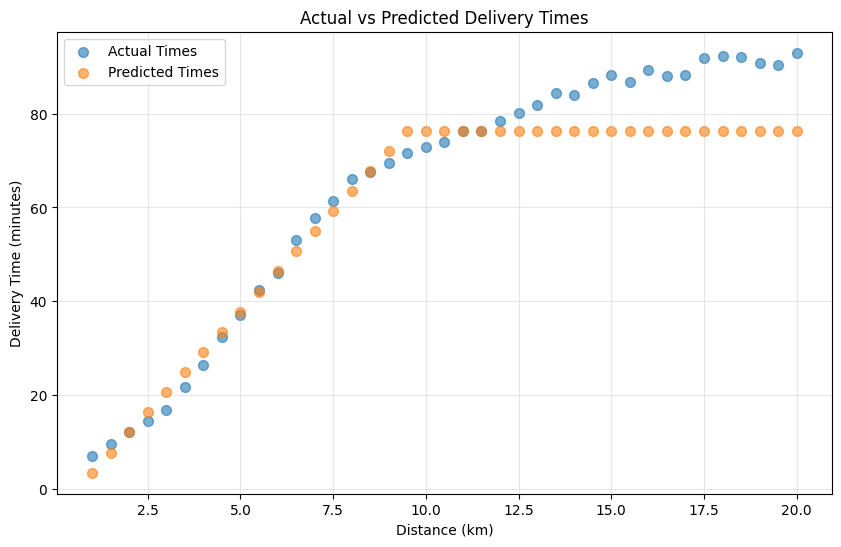

In [30]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(new_distances.numpy(), new_times.numpy(), 
           label='Actual Times', alpha=0.6, s=50)
plt.scatter(new_distances.numpy(), predicted_times.numpy(), 
           label='Predicted Times', alpha=0.6, s=50)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Actual vs Predicted Delivery Times')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

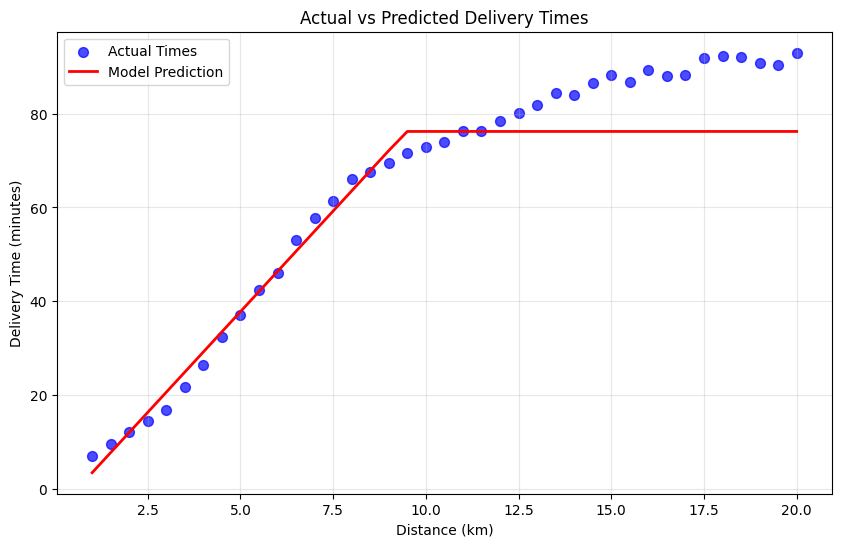

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(new_distances.numpy(), new_times.numpy(), 
           label='Actual Times', alpha=0.7, s=50, color='blue')
plt.plot(new_distances.numpy(), predicted_times.numpy(), 
         label='Model Prediction', color='red', linewidth=2)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Actual vs Predicted Delivery Times')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()